In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.decomposition import PCA, NMF
pd.options.display.max_columns = None 
from itertools import combinations
from scipy.stats import pearsonr
import networkx as nx
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, accuracy_score
import nxviz as nv
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_excel('speech_data.xlsx', header= 0, parse_dates= ['Date'])

,Doc Number,Date,Title,Speech Length,Unique Words,Positive,Negative,Trust,Fear,Sadness,Anger,Surprise,Disgust,Joy,Anticipation,Womens Issues,Constitution Issues,Social Issues,Environmental Issues,Military/Defense,Foreign Relations,Healthcare/Welfare,US Economy,adjusted_approve,adjusted_disapprove
0,1,2017-01-20,Inaugural Address,11122,452,1492,379,1453,496,195,304,239,145,974,986,89,61,100,111,238,243,194,271,44.337578,41.444922
1,2,2017-01-20,Statement on Senate Confirmation of James N. M...,65,42,9,2,13,3,2,2,0,2,4,2,0,3,0,0,2,2,0,0,44.337578,41.444922
2,3,2017-01-20,Executive Order 13765—Minimizing the Economic ...,1381,182,82,24,164,26,9,9,0,3,34,45,19,5,6,0,2,0,96,55,44.337578,41.444922
3,4,2017-01-20,Proclamation 9570—National Day of Patriotic De...,507,80,38,0,83,10,0,0,11,7,35,23,0,10,0,0,11,0,0,0,44.337578,41.444922
4,5,2017-01-21,Remarks at the Central Intelligence Agency in ...,20988,554,2354,603,1370,460,476,471,943,461,1434,1472,26,119,12,100,221,137,18,163,44.337578,41.444922
5,6,2017-01-22,Remarks at a Swearing-In Ceremony for White Ho...,4359,267,598,91,510,68,44,46,115,21,286,393,28,14,13,11,76,129,45,47,44.337578,41.444922
6,7,2017-01-23,Memorandum on the Federal Civilian Employee Hi...,1159,147,26,74,98,41,30,19,7,8,17,71,0,3,0,0,29,9,48,17,45.903035,44.204495
7,8,2017-01-23,Memorandum on the Mexico City Policy,531,83,23,13,44,8,8,3,0,8,6,13,14,5,0,0,0,12,41,0,45.903035,44.204495
8,9,2017-01-23,Memorandum on Withdrawal of the United States ...,450,83,24,0,68,0,8,0,3,0,10,11,10,4,0,4,4,61,3,29,45.903035,44.204495
9,10,2017-01-23,Remarks at a Breakfast and Listening Session W...,14323,337,1286,224,848,340,770,230,485,162,433,637,17,87,0,56,99,298,17,969,45.903035,44.204495


In [4]:
df.describe()

,Doc Number,Speech Length,Unique Words,Positive,Negative,Trust,Fear,Sadness,Anger,Surprise,Disgust,Joy,Anticipation,Womens Issues,Constitution Issues,Social Issues,Environmental Issues,Military/Defense,Foreign Relations,Healthcare/Welfare,US Economy,adjusted_approve,adjusted_disapprove
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,510.500000,20970.535294,296.676471,2057.594118,771.652941,1654.209804,723.932353,542.767647,552.973529,527.738235,317.516667,937.041176,1146.543137,112.687255,218.247059,140.992157,91.100000,456.492157,443.537255,312.853922,437.520588,40.262669,53.681647
std,294.592939,66593.226276,264.165795,6167.942170,2949.887046,4616.358923,2546.439639,1954.210310,2083.313604,1759.725569,1202.972543,2792.203284,3584.426038,425.758193,1103.949064,655.116271,352.860805,1827.471639,1461.865096,1043.724403,1448.883454,2.704118,3.288645
min,1.000000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.329520,41.444922
25%,255.750000,632.250000,115.750000,52.000000,13.000000,63.000000,16.000000,8.000000,8.000000,9.000000,5.000000,22.000000,30.000000,0.000000,1.000000,0.000000,0.000000,7.000000,6.000000,6.750000,3.000000,38.133906,51.727538
50%,510.500000,1873.000000,211.000000,190.500000,53.000000,202.500000,63.000000,33.000000,36.000000,36.000000,20.000000,86.500000,106.000000,7.000000,8.000000,4.000000,0.000000,30.000000,26.500000,31.000000,27.000000,39.533578,54.581706
75%,765.250000,11397.250000,373.500000,1121.500000,270.500000,1051.500000,299.000000,178.000000,210.500000,238.250000,104.250000,521.250000,625.250000,48.000000,46.250000,36.250000,22.500000,169.750000,149.250000,170.000000,197.000000,42.176353,55.980077
max,1020.000000,913412.000000,1590.000000,78838.000000,53054.000000,55574.000000,35392.000000,31333.000000,30706.000000,24234.000000,20118.000000,35037.000000,54166.000000,5277.000000,20071.000000,9749.000000,6583.000000,34153.000000,20455.000000,18088.000000,21164.000000,47.354020,59.673707


In [5]:
df.corr()

,Doc Number,Speech Length,Unique Words,Positive,Negative,Trust,Fear,Sadness,Anger,Surprise,Disgust,Joy,Anticipation,Womens Issues,Constitution Issues,Social Issues,Environmental Issues,Military/Defense,Foreign Relations,Healthcare/Welfare,US Economy,adjusted_approve,adjusted_disapprove
Doc Number,1.000000,0.082067,0.034231,0.082762,0.055365,0.067751,0.074067,0.072576,0.074910,0.073480,0.057836,0.070432,0.062605,0.023881,0.067779,0.038359,0.066657,0.064331,0.069892,0.038074,0.102233,-0.648662,0.685971
Speech Length,0.082067,1.000000,0.724204,0.983186,0.945800,0.975984,0.920055,0.950933,0.936003,0.963836,0.931286,0.945312,0.975077,0.749412,0.862630,0.775811,0.662756,0.809672,0.790534,0.804601,0.743596,0.031815,-0.013522
Unique Words,0.034231,0.724204,1.000000,0.743171,0.663902,0.773690,0.695872,0.691054,0.674567,0.705453,0.671576,0.754204,0.731584,0.602359,0.540142,0.540173,0.556010,0.581333,0.673724,0.642615,0.640039,0.031625,-0.024313
Positive,0.082762,0.983186,0.743171,1.000000,0.911751,0.968287,0.902450,0.933000,0.915239,0.973873,0.905864,0.965380,0.978181,0.747134,0.836405,0.745388,0.680940,0.747110,0.767300,0.791939,0.765049,0.033538,-0.012457
Negative,0.055365,0.945800,0.663902,0.911751,1.000000,0.930781,0.952128,0.964054,0.972208,0.907356,0.974839,0.893592,0.935975,0.783825,0.935747,0.864457,0.513939,0.772818,0.768576,0.747645,0.589261,0.031584,-0.013974
Trust,0.067751,0.975984,0.773690,0.968287,0.930781,1.000000,0.940206,0.933392,0.943232,0.941421,0.928154,0.942334,0.955959,0.758648,0.853529,0.787054,0.657742,0.777980,0.778813,0.806963,0.721971,0.043804,-0.027212
Fear,0.074067,0.920055,0.695872,0.902450,0.952128,0.940206,1.000000,0.929831,0.984414,0.876962,0.940507,0.877375,0.905013,0.787683,0.911608,0.857088,0.531129,0.712302,0.709448,0.737091,0.575781,0.033397,-0.015911
Sadness,0.072576,0.950933,0.691054,0.933000,0.964054,0.933392,0.929831,1.000000,0.957097,0.939596,0.972165,0.932808,0.961014,0.810192,0.885574,0.838514,0.576528,0.711256,0.764430,0.768746,0.726534,0.013055,0.002525
Anger,0.074910,0.936003,0.674567,0.915239,0.972208,0.943232,0.984414,0.957097,1.000000,0.907937,0.969433,0.903395,0.930706,0.783563,0.938536,0.865027,0.535316,0.730215,0.730310,0.727537,0.603295,0.026005,-0.008808
Surprise,0.073480,0.963836,0.705453,0.973873,0.907356,0.941421,0.876962,0.939596,0.907937,1.000000,0.916639,0.980149,0.985793,0.715390,0.823484,0.733994,0.668342,0.746447,0.761255,0.747520,0.752917,0.029091,-0.007843


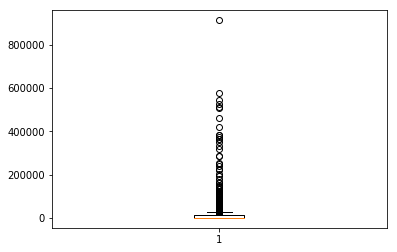

In [76]:
corpora = df.columns[5:23]
percent = pd.DataFrame()
for i in corpora:
    percent[i+'_percent'] = df[i]/df['Speech Length']
percent['Doc#'] = percent.index + 1
percent.index = df.Date
percent

ValueError: Cannot shift with no freq

In [7]:
columns = df.columns[3:23]
columns = columns.delete(1)


In [8]:
percent.describe()

,Positive_percent,Negative_percent,Trust_percent,Fear_percent,Sadness_percent,Anger_percent,Surprise_percent,Disgust_percent,Joy_percent,Anticipation_percent,Womens Issues_percent,Constitution Issues_percent,Social Issues_percent,Environmental Issues_percent,Military/Defense_percent,Foreign Relations_percent,Healthcare/Welfare_percent,US Economy_percent,Doc#
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,0.102370,0.034216,0.103357,0.037287,0.022626,0.023739,0.022569,0.014603,0.048578,0.056611,0.007710,0.008021,0.006443,0.004031,0.026919,0.024046,0.020017,0.019529,510.500000
std,0.052780,0.030042,0.036703,0.029842,0.021136,0.021719,0.015917,0.015120,0.031051,0.025998,0.013617,0.011168,0.012268,0.009857,0.030738,0.027973,0.020972,0.023303,294.592939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.064064,0.013880,0.075909,0.016378,0.008132,0.009568,0.010930,0.004840,0.027141,0.039577,0.000000,0.000377,0.000000,0.000000,0.005059,0.004938,0.006832,0.002752,255.750000
50%,0.097016,0.026683,0.101454,0.030362,0.018671,0.019136,0.021351,0.011226,0.043210,0.054452,0.003447,0.004457,0.001418,0.000000,0.016485,0.014678,0.014123,0.011111,510.500000
75%,0.135153,0.045744,0.125891,0.052399,0.031273,0.031681,0.031386,0.019054,0.063887,0.070084,0.009258,0.010832,0.007688,0.004093,0.036199,0.031678,0.025815,0.028266,765.250000
max,0.333333,0.333333,0.308411,0.333333,0.285714,0.190476,0.102965,0.142857,0.242991,0.261682,0.147982,0.131148,0.098442,0.132401,0.204986,0.205882,0.152466,0.149673,1020.000000


In [9]:
y = percent.corr()
y
#y.to_excel('../Trump_Speeches/correlation.xlsx')

,Positive_percent,Negative_percent,Trust_percent,Fear_percent,Sadness_percent,Anger_percent,Surprise_percent,Disgust_percent,Joy_percent,Anticipation_percent,Womens Issues_percent,Constitution Issues_percent,Social Issues_percent,Environmental Issues_percent,Military/Defense_percent,Foreign Relations_percent,Healthcare/Welfare_percent,US Economy_percent,Doc#
Positive_percent,1.000000,-0.201314,0.000838,-0.172469,-0.112368,-0.119267,0.284988,-0.173831,0.534021,0.324527,0.010627,-0.105087,-0.026359,-0.071671,-0.261168,0.176090,-0.207694,-0.014079,-0.008970
Negative_percent,-0.201314,1.000000,-0.057850,0.713703,0.738931,0.730954,0.224862,0.652259,-0.007679,0.077757,0.114636,0.202576,0.190546,-0.082893,0.294351,0.106417,0.109964,-0.196930,0.031431
Trust_percent,0.000838,-0.057850,1.000000,0.158991,-0.048874,0.030940,0.033548,0.035039,0.388361,0.300071,0.029754,0.112148,0.072021,-0.045438,0.092721,0.043404,0.046402,-0.123492,-0.106146
Fear_percent,-0.172469,0.713703,0.158991,1.000000,0.679489,0.797985,0.222142,0.640591,0.098414,0.203719,0.095437,0.194112,0.195804,-0.086902,0.423277,0.009947,0.046854,-0.273589,0.005030
Sadness_percent,-0.112368,0.738931,-0.048874,0.679489,1.000000,0.655190,0.347908,0.689921,0.098034,0.140347,0.168805,0.143450,0.191351,-0.144379,0.082890,-0.023615,0.153615,-0.025712,0.058975
Anger_percent,-0.119267,0.730954,0.030940,0.797985,0.655190,1.000000,0.134941,0.716565,0.038116,0.140099,0.134114,0.239441,0.259809,-0.063498,0.294608,0.046750,0.026683,-0.205155,0.004476
Surprise_percent,0.284988,0.224862,0.033548,0.222142,0.347908,0.134941,1.000000,0.210496,0.551109,0.539099,-0.007585,0.048281,0.019726,-0.096116,-0.061872,0.048324,-0.072135,-0.100092,0.012292
Disgust_percent,-0.173831,0.652259,0.035039,0.640591,0.689921,0.716565,0.210496,1.000000,0.014807,0.041371,0.119132,0.219211,0.191146,-0.042901,0.149004,0.016032,0.120036,-0.149736,0.004525
Joy_percent,0.534021,-0.007679,0.388361,0.098414,0.098034,0.038116,0.551109,0.014807,1.000000,0.734317,0.109604,0.017238,0.081270,-0.037074,-0.155231,0.058184,-0.105430,-0.088035,-0.023952
Anticipation_percent,0.324527,0.077757,0.300071,0.203719,0.140347,0.140099,0.539099,0.041371,0.734317,1.000000,0.054899,0.008143,0.032514,-0.038552,-0.004974,0.006911,-0.062108,-0.099418,-0.044618


In [10]:
y = combinations(percent.columns, 2)
for i in y:
    (r, p) = pearsonr(percent[i[0]], percent[i[1]])
    print("the coefficient for " + str(i[0]) + "and " + str(i[1]) + "is: " + str(r))
    print(p)

the coefficient for Positive_percentand Negative_percentis: -0.2013138367070092
8.692516690681426e-11
the coefficient for Positive_percentand Trust_percentis: 0.0008381153799877475
0.9786715423075857
the coefficient for Positive_percentand Fear_percentis: -0.17246872894779205
2.9726095256587222e-08
the coefficient for Positive_percentand Sadness_percentis: -0.11236760287803568
0.00032348769674412774
the coefficient for Positive_percentand Anger_percentis: -0.11926746279026773
0.00013450398583001328
the coefficient for Positive_percentand Surprise_percentis: 0.2849875498232054
1.635377917852969e-20
the coefficient for Positive_percentand Disgust_percentis: -0.1738311015196478
2.3035625667235647e-08
the coefficient for Positive_percentand Joy_percentis: 0.5340208084650423
2.857640888397162e-76
the coefficient for Positive_percentand Anticipation_percentis: 0.32452711347361474
1.9167686853448628e-26
the coefficient for Positive_percentand Womens Issues_percentis: 0.010626893147045104
0.73

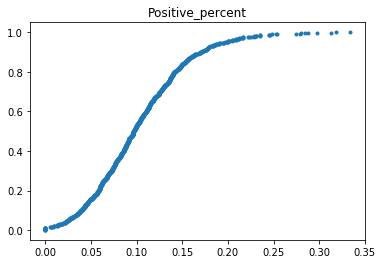

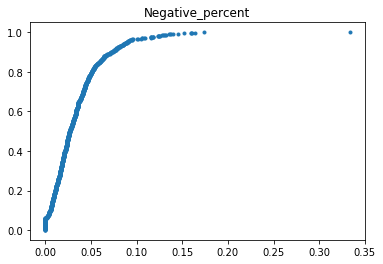

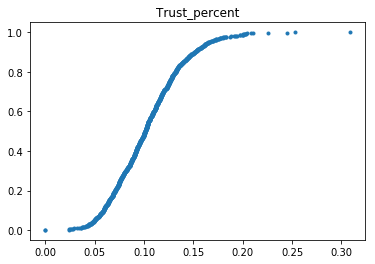

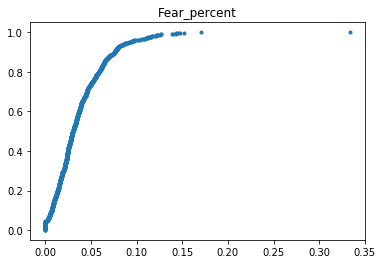

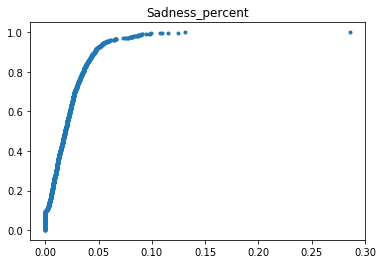

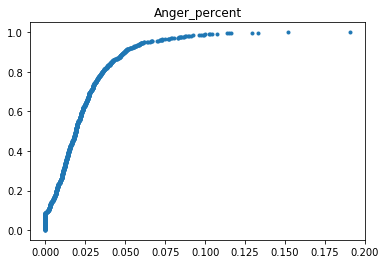

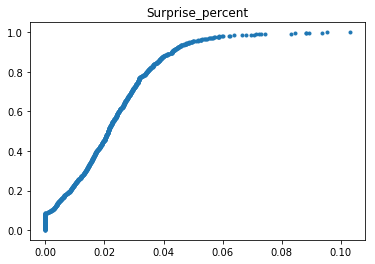

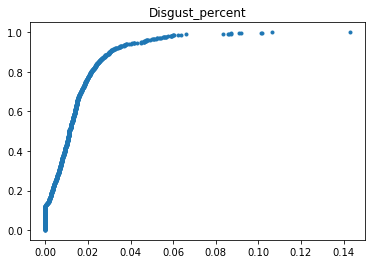

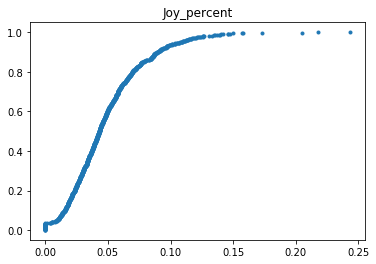

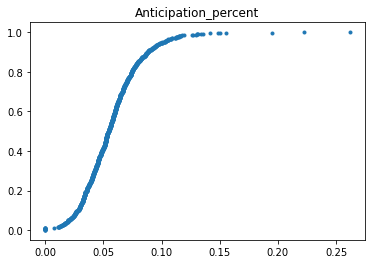

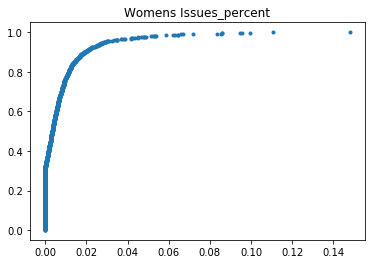

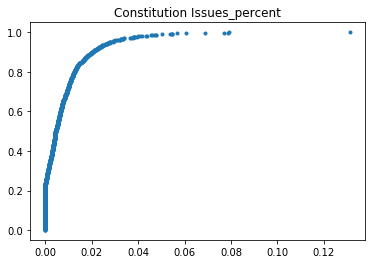

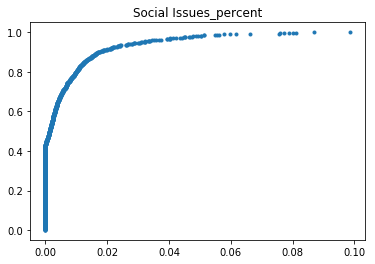

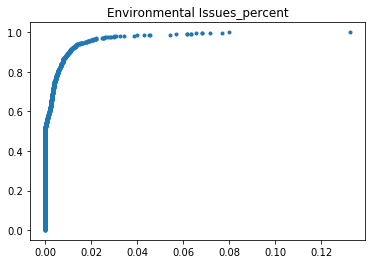

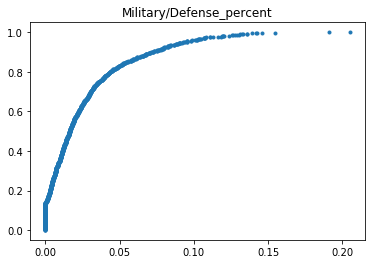

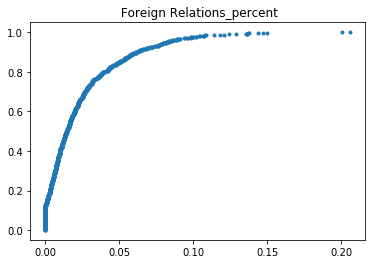

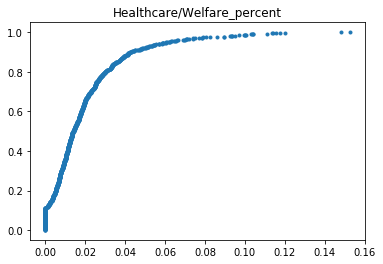

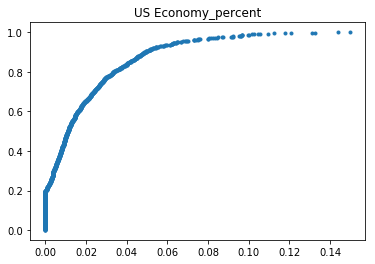

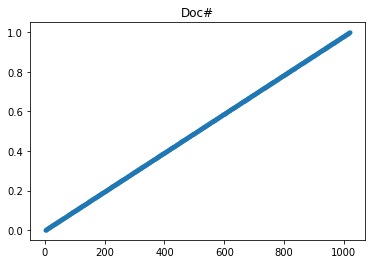

In [11]:
def ecdf(data, col):
    x = np.sort(data[col])
    y = np.arange(1, len(x) + 1)/len(x)
    plt.plot(x, y, linestyle = 'none', marker = '.')
    return plt.show()
for i in percent.columns:
    plt.title(i)
    ecdf(percent, i)


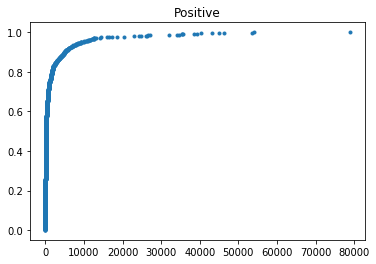

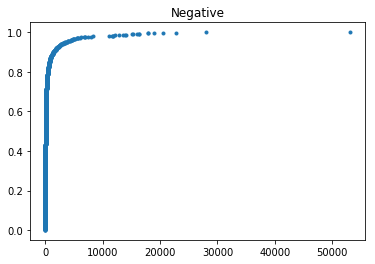

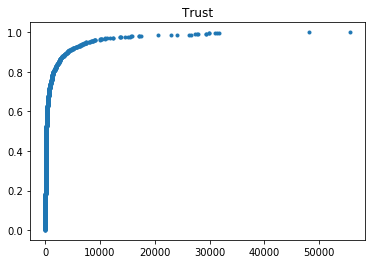

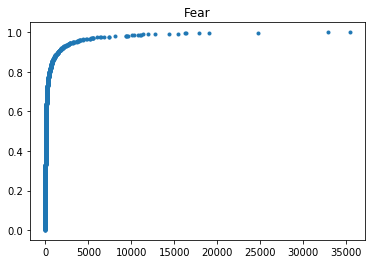

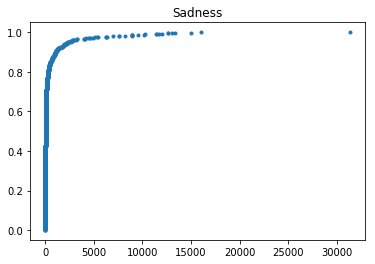

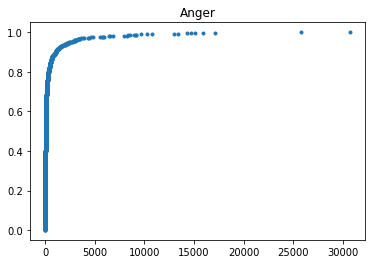

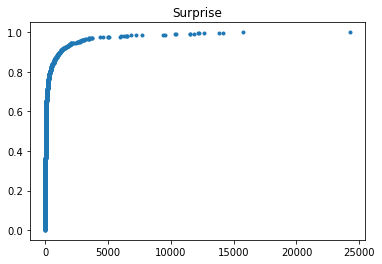

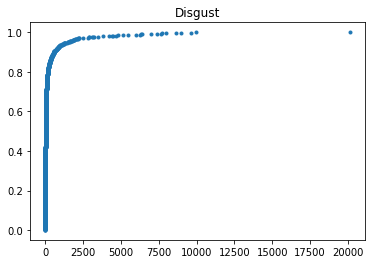

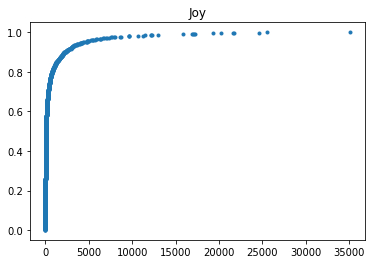

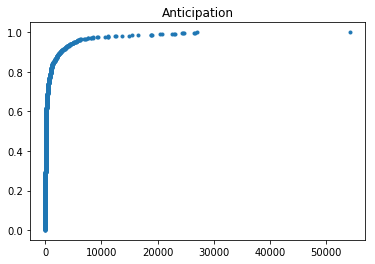

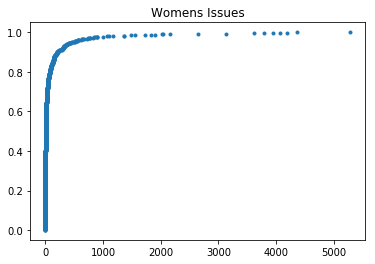

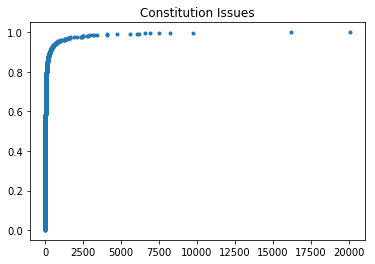

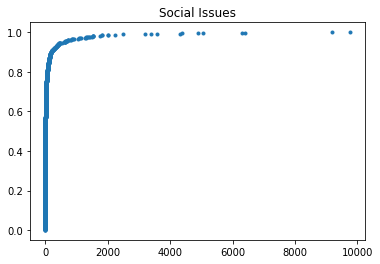

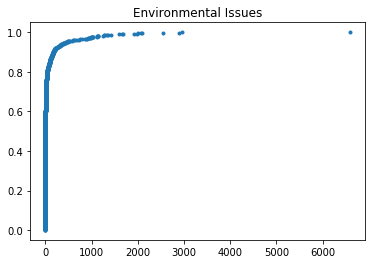

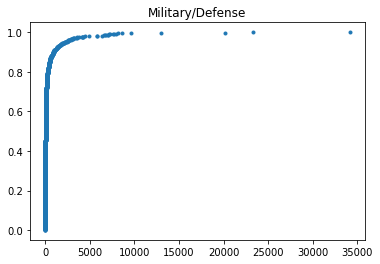

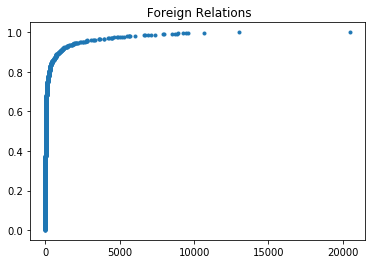

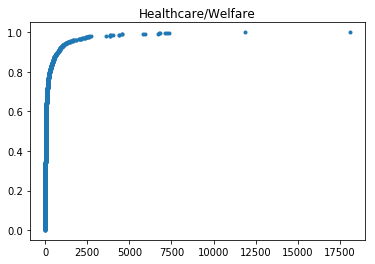

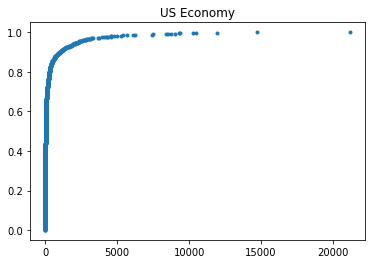

In [12]:
for i in corpora:
    plt.title(i)
    ecdf(df, i)

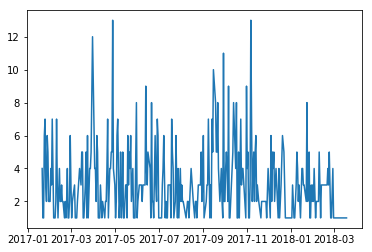

In [13]:
x = df.groupby('Date')['Doc Number'].count()
plt.plot(x)

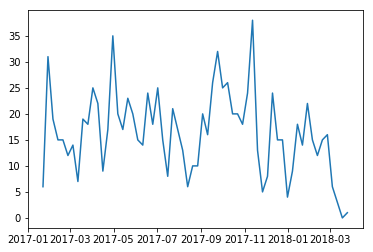

In [14]:
test = df[['Date', 'Doc Number']]
test.index = df.Date
y = test['Doc Number'].resample('W').count()
plt.plot(y)

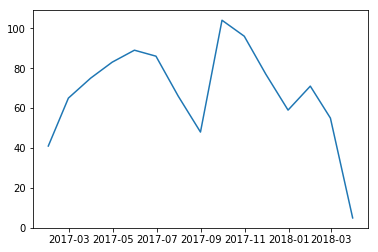

In [15]:
test = df[['Date', 'Doc Number']]
test.index = df.Date
y = test['Doc Number'].resample('M').count()
plt.plot(y)

In [16]:
by_day = df.groupby('Date')[columns].sum()
grouped_speeches = pd.DataFrame()
for i in corpora:
    grouped_speeches[i+'_percent'] = by_day[i]/by_day['Speech Length']
copy_df = df.copy()
copy_df.index = copy_df.Date
copy_df = copy_df[['adjusted_approve', 'adjusted_disapprove']]
grouped_df = pd.merge(grouped_speeches, copy_df, left_index=True, right_index=True)
final_df = grouped_df.groupby(grouped_df.index).mean()

In [17]:
final_df

,Positive_percent,Negative_percent,Trust_percent,Fear_percent,Sadness_percent,Anger_percent,Surprise_percent,Disgust_percent,Joy_percent,Anticipation_percent,Womens Issues_percent,Constitution Issues_percent,Social Issues_percent,Environmental Issues_percent,Military/Defense_percent,Foreign Relations_percent,Healthcare/Welfare_percent,US Economy_percent,adjusted_approve,adjusted_disapprove
Date,,,,,,,,,,,,,,,,,,,,
2017-01-20,0.123977,0.030975,0.131013,0.040918,0.015755,0.024092,0.019120,0.012008,0.080076,0.080765,0.008260,0.006042,0.008107,0.008489,0.019350,0.018738,0.022180,0.024933,44.337578,41.444922
2017-01-21,0.112159,0.028731,0.065275,0.021917,0.022680,0.022441,0.044930,0.021965,0.068325,0.070135,0.001239,0.005670,0.000572,0.004765,0.010530,0.006528,0.000858,0.007766,44.337578,41.444922
2017-01-22,0.137187,0.020876,0.116999,0.015600,0.010094,0.010553,0.026382,0.004818,0.065611,0.090158,0.006423,0.003212,0.002982,0.002524,0.017435,0.029594,0.010323,0.010782,44.337578,41.444922
2017-01-23,0.084979,0.019929,0.064537,0.023142,0.041814,0.018579,0.027612,0.011641,0.028916,0.043584,0.003213,0.009592,0.000000,0.003446,0.007124,0.022351,0.005075,0.049870,45.903035,44.204495
2017-01-24,0.059084,0.016787,0.088853,0.013892,0.008104,0.007856,0.011246,0.005086,0.028488,0.037294,0.001158,0.011288,0.000662,0.009758,0.010337,0.003184,0.006863,0.022658,46.131450,43.598170
2017-01-25,0.070831,0.025486,0.109501,0.027430,0.014639,0.019369,0.007829,0.012913,0.021585,0.035014,0.004186,0.005913,0.010412,0.000476,0.041185,0.022346,0.019193,0.008944,44.264068,41.997541
2017-01-26,0.114945,0.039684,0.100180,0.037603,0.025312,0.026072,0.031106,0.021965,0.053577,0.067584,0.006806,0.010265,0.002362,0.007256,0.025650,0.019659,0.018169,0.031809,45.584699,45.752679
2017-01-27,0.073276,0.030716,0.088672,0.029059,0.020539,0.024114,0.018970,0.013477,0.034776,0.054095,0.002391,0.007772,0.003027,0.000125,0.044467,0.049436,0.015545,0.015059,43.954020,46.147538
2017-01-28,0.036042,0.017572,0.123572,0.020266,0.007287,0.014953,0.008590,0.002682,0.035915,0.037067,0.000455,0.003175,0.001670,0.000468,0.029413,0.003783,0.023277,0.013739,44.930620,45.715484


In [18]:
grouped_speeches.describe()

,Positive_percent,Negative_percent,Trust_percent,Fear_percent,Sadness_percent,Anger_percent,Surprise_percent,Disgust_percent,Joy_percent,Anticipation_percent,Womens Issues_percent,Constitution Issues_percent,Social Issues_percent,Environmental Issues_percent,Military/Defense_percent,Foreign Relations_percent,Healthcare/Welfare_percent,US Economy_percent
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,0.110345,0.033963,0.095662,0.036976,0.023378,0.024773,0.024532,0.014262,0.052703,0.059888,0.008459,0.007034,0.006755,0.004147,0.025346,0.023183,0.018669,0.020007
std,0.037066,0.021257,0.027062,0.020500,0.013224,0.015655,0.010613,0.009800,0.023268,0.018967,0.013368,0.006585,0.008878,0.006658,0.022965,0.021154,0.016108,0.017043
min,0.000000,0.000000,0.047196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.088256,0.019938,0.075163,0.022643,0.013619,0.014798,0.017444,0.008295,0.036582,0.047512,0.002367,0.002795,0.001100,0.000106,0.010014,0.007658,0.009597,0.007123
50%,0.105122,0.031178,0.092466,0.033772,0.022348,0.022426,0.023676,0.012871,0.049261,0.058082,0.005128,0.005418,0.003899,0.002546,0.019347,0.017036,0.015063,0.015529
75%,0.131101,0.043452,0.110281,0.047601,0.031080,0.030211,0.030968,0.018321,0.064262,0.070182,0.009195,0.010104,0.008837,0.005287,0.031952,0.031385,0.022158,0.029468
max,0.298066,0.173913,0.193548,0.152174,0.109422,0.152174,0.061813,0.086957,0.157895,0.148387,0.147982,0.062753,0.055556,0.068027,0.142132,0.124260,0.152466,0.089893


In [19]:
grouped_speeches.corr()

,Positive_percent,Negative_percent,Trust_percent,Fear_percent,Sadness_percent,Anger_percent,Surprise_percent,Disgust_percent,Joy_percent,Anticipation_percent,Womens Issues_percent,Constitution Issues_percent,Social Issues_percent,Environmental Issues_percent,Military/Defense_percent,Foreign Relations_percent,Healthcare/Welfare_percent,US Economy_percent
Positive_percent,1.000000,-0.191853,0.177097,-0.108671,-0.120693,-0.168682,0.378429,-0.182680,0.627056,0.522166,0.031351,-0.174130,0.010786,0.001914,-0.093077,-0.004068,-0.089841,-0.152276
Negative_percent,-0.191853,1.000000,-0.073173,0.718527,0.736249,0.768967,0.109079,0.686245,-0.030872,0.036899,0.053655,0.234806,0.229921,-0.091621,0.253836,0.212096,0.029096,-0.202879
Trust_percent,0.177097,-0.073173,1.000000,0.206084,-0.212993,0.003067,-0.063509,-0.051345,0.378389,0.308517,0.125611,0.012050,0.111208,0.008868,0.245104,0.119033,0.071385,-0.307342
Fear_percent,-0.108671,0.718527,0.206084,1.000000,0.560072,0.793838,0.034298,0.591062,0.072886,0.075912,0.061062,0.169157,0.235429,-0.096030,0.446508,0.157217,-0.002648,-0.338294
Sadness_percent,-0.120693,0.736249,-0.212993,0.560072,1.000000,0.647396,0.189021,0.624991,-0.026851,0.009097,0.152452,0.160598,0.202627,-0.167978,0.004899,0.031902,0.167810,0.082545
Anger_percent,-0.168682,0.768967,0.003067,0.793838,0.647396,1.000000,0.022064,0.725479,-0.065780,-0.009003,0.077358,0.258671,0.237504,-0.117498,0.282645,0.157926,-0.030287,-0.190844
Surprise_percent,0.378429,0.109079,-0.063509,0.034298,0.189021,0.022064,1.000000,0.091352,0.544559,0.509808,-0.104249,-0.008134,0.038745,-0.072364,-0.152541,-0.051144,-0.099101,-0.037141
Disgust_percent,-0.182680,0.686245,-0.051345,0.591062,0.624991,0.725479,0.091352,1.000000,-0.066155,-0.056686,0.106017,0.208140,0.179724,-0.042063,0.182275,0.099351,0.036280,-0.150454
Joy_percent,0.627056,-0.030872,0.378389,0.072886,-0.026851,-0.065780,0.544559,-0.066155,1.000000,0.794886,0.086312,-0.059980,0.069164,0.003963,-0.080783,-0.003508,-0.051677,-0.118032
Anticipation_percent,0.522166,0.036899,0.308517,0.075912,0.009097,-0.009003,0.509808,-0.056686,0.794886,1.000000,0.104642,-0.109025,0.087716,-0.071482,-0.057308,0.022432,0.041911,-0.125096


In [20]:
final_df.describe()

,Positive_percent,Negative_percent,Trust_percent,Fear_percent,Sadness_percent,Anger_percent,Surprise_percent,Disgust_percent,Joy_percent,Anticipation_percent,Womens Issues_percent,Constitution Issues_percent,Social Issues_percent,Environmental Issues_percent,Military/Defense_percent,Foreign Relations_percent,Healthcare/Welfare_percent,US Economy_percent,adjusted_approve,adjusted_disapprove
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,0.110345,0.033963,0.095662,0.036976,0.023378,0.024773,0.024532,0.014262,0.052703,0.059888,0.008459,0.007034,0.006755,0.004147,0.025346,0.023183,0.018669,0.020007,40.374542,53.591389
std,0.037066,0.021257,0.027062,0.020500,0.013224,0.015655,0.010613,0.009800,0.023268,0.018967,0.013368,0.006585,0.008878,0.006658,0.022965,0.021154,0.016108,0.017043,2.789210,3.315382
min,0.000000,0.000000,0.047196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016899,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.329520,41.444922
25%,0.088256,0.019938,0.075163,0.022643,0.013619,0.014798,0.017444,0.008295,0.036582,0.047512,0.002367,0.002795,0.001100,0.000106,0.010014,0.007658,0.009597,0.007123,38.202791,51.713768
50%,0.105122,0.031178,0.092466,0.033772,0.022348,0.022426,0.023676,0.012871,0.049261,0.058082,0.005128,0.005418,0.003899,0.002546,0.019347,0.017036,0.015063,0.015529,39.720180,54.519456
75%,0.131101,0.043452,0.110281,0.047601,0.031080,0.030211,0.030968,0.018321,0.064262,0.070182,0.009195,0.010104,0.008837,0.005287,0.031952,0.031385,0.022158,0.029468,42.453326,55.984640
max,0.298066,0.173913,0.193548,0.152174,0.109422,0.152174,0.061813,0.086957,0.157895,0.148387,0.147982,0.062753,0.055556,0.068027,0.142132,0.124260,0.152466,0.089893,47.354020,59.673707


In [21]:
pca = PCA()
pca.fit_transform(grouped_speeches)

array([[ 0.03739215,  0.01124227, -0.02105388, ..., -0.0007047 ,
         0.000806  , -0.00067832],
       [ 0.00993048, -0.0223964 ,  0.02783547, ..., -0.00525213,
         0.00013578,  0.00046549],
       [ 0.04804626, -0.01401881, -0.02021582, ..., -0.00092062,
        -0.00034633,  0.00082799],
       ...,
       [-0.04687217, -0.01858604, -0.02795016, ..., -0.00245543,
         0.00267768, -0.00053302],
       [-0.01519814, -0.01924134, -0.01666442, ...,  0.00171272,
         0.00717149, -0.00014173],
       [-0.07845356, -0.03278864, -0.03502316, ..., -0.00121563,
         0.00125972, -0.00996252]])

<BarContainer object of 18 artists>

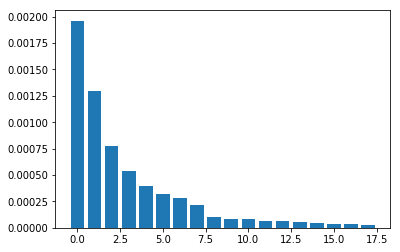

In [22]:
plt.bar(range(pca.n_components_), pca.explained_variance_)

In [23]:
nmf = NMF(n_components=6)
nmf.fit_transform(grouped_speeches)

array([[0.07990511, 0.03359375, 0.08113062, 0.02063333, 0.01593128,
        0.03102494],
       [0.09190331, 0.04157077, 0.03083873, 0.00268881, 0.00518133,
        0.00130597],
       [0.09923314, 0.01595979, 0.05591353, 0.01540745, 0.02978405,
        0.00933749],
       ...,
       [0.01544541, 0.02446567, 0.09777634, 0.0068345 , 0.        ,
        0.07182081],
       [0.02834036, 0.01155849, 0.06398067, 0.        , 0.05409081,
        0.12846524],
       [0.00789375, 0.01723432, 0.06650024, 0.02872793, 0.        ,
        0.01455024]])

In [24]:
components = pd.DataFrame(nmf.components_, columns=grouped_speeches.columns)

In [25]:
features = pd.DataFrame(nmf.transform(grouped_speeches), index=grouped_speeches.index)

In [26]:
for i in grouped_speeches.columns:
    x = components[i]
    print(x.nlargest())

0    1.268044
3    0.574630
5    0.408645
1    0.000000
2    0.000000
Name: Positive_percent, dtype: float64
1    0.751957
5    0.100720
4    0.075706
3    0.036433
0    0.000000
Name: Negative_percent, dtype: float64
2    1.103145
4    0.619371
3    0.476672
0    0.302768
1    0.000000
Name: Trust_percent, dtype: float64
1    0.603904
3    0.242255
2    0.144895
0    0.012251
4    0.000000
Name: Fear_percent, dtype: float64
1    0.425982
5    0.196483
0    0.015771
2    0.000000
3    0.000000
Name: Sadness_percent, dtype: float64
1    0.511843
3    0.090160
5    0.065508
2    0.014991
4    0.005397
Name: Anger_percent, dtype: float64
0    0.229355
1    0.159518
5    0.068903
2    0.033955
4    0.004770
Name: Surprise_percent, dtype: float64
1    0.286548
5    0.059779
3    0.031336
2    0.012090
0    0.000000
Name: Disgust_percent, dtype: float64
0    0.536379
2    0.300567
1    0.139391
4    0.061418
3    0.000000
Name: Joy_percent, dtype: float64
0    0.472633
2    0.334390
1    0.2

In [27]:
test = pd.merge(grouped_speeches, features, left_index = True, right_index=True)
edges = test.corr()[-6:].T
edges = edges[:-6]
new_index = []
for i in edges.index:
    new_index.append(str(i)[0:4])
edges.index = new_index
edges = edges.drop(["Envi", " For"])


In [28]:
y = combinations(test.columns, 2)
for i in y:
    (r, p) = pearsonr(test[i[0]], test[i[1]])
    print("the coefficient for " + str(i[0]) + "and " + str(i[1]) + "is: " + str(r))
    print(p)

the coefficient for Positive_percentand Negative_percentis: -0.19185255561679543
0.0005371899743974534
the coefficient for Positive_percentand Trust_percentis: 0.1770966877670073
0.0014188656275968816
the coefficient for Positive_percentand Fear_percentis: -0.10867117855151483
0.05138812992053555
the coefficient for Positive_percentand Sadness_percentis: -0.1206930815550175
0.03036789726420747
the coefficient for Positive_percentand Anger_percentis: -0.1686823922073123
0.0023901162363313567
the coefficient for Positive_percentand Surprise_percentis: 0.3784288865797382
2.1054483630492955e-12
the coefficient for Positive_percentand Disgust_percentis: -0.18267966352053203
0.0009909814921138503
the coefficient for Positive_percentand Joy_percentis: 0.627056478818262
1.3707970731630894e-36
the coefficient for Positive_percentand Anticipation_percentis: 0.5221662142578665
6.396160602154008e-24
the coefficient for Positive_percentand Womens Issues_percentis: 0.03135050908537221
0.575128352879

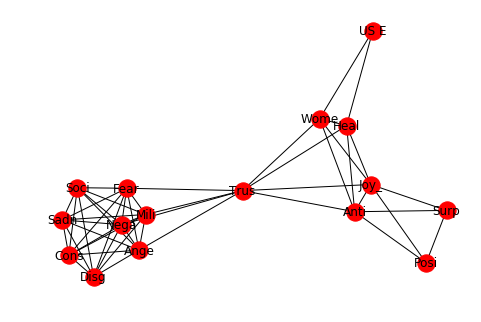

In [29]:

new = nx.Graph()
new.add_nodes_from(edges.columns, bipartite = 'group')
new.add_nodes_from(edges.index, bipartite = 'topic')
for i in edges.columns:
    for j in edges.index:
        if edges.loc[j][i] > 0.25:# or edges.loc[j][i] < -0.25:
            new.add_edge(i, j, weight = edges.loc[j][i])
cluster = nx.bipartite.weighted_projected_graph(new, [n for n, d in new.nodes(data = True) if d['bipartite'] == 'topic'])

nx.draw(cluster,with_labels=True)
plt.show()

#nx.degree_centrality(cluster)
#nx.betweenness_centrality(cluster)

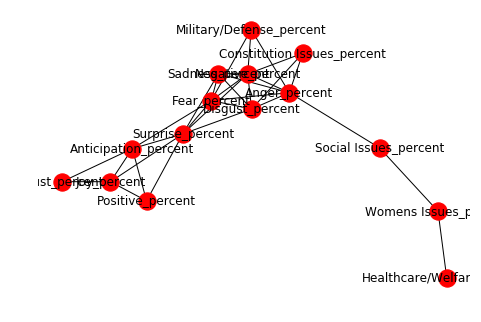

In [30]:
net_corr = percent.drop(["Doc#", "Environmental Issues_percent", "US Economy_percent", " Foreign Relations_percent"], axis = 1)
correlations = nx.Graph()
correlations.add_nodes_from(net_corr.columns)
for i, j in combinations(net_corr.columns, 2):
    r, p = pearsonr(net_corr[i], net_corr[j])
    if r > 0.20:
        correlations.add_edge(i, j, wieght = r)
nx.draw(correlations, with_labels=True,)
plt.show()

In [31]:
len(percent.columns)
percent.columns

Index(['Positive_percent', 'Negative_percent', 'Trust_percent', 'Fear_percent',
       'Sadness_percent', 'Anger_percent', 'Surprise_percent',
       'Disgust_percent', 'Joy_percent', 'Anticipation_percent',
       'Womens Issues_percent', 'Constitution Issues_percent',
       'Social Issues_percent', 'Environmental Issues_percent',
       'Military/Defense_percent', ' Foreign Relations_percent',
       'Healthcare/Welfare_percent', 'US Economy_percent', 'Doc#'],
      dtype='object')

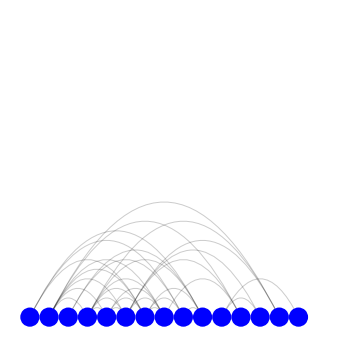

In [32]:
c = nv.ArcPlot(correlations, edge_width= 'weight')
c.draw()
plt.show()

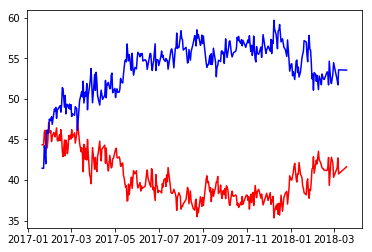

In [33]:
plt.plot(final_df['adjusted_approve'], c = 'red')
plt.plot(final_df['adjusted_disapprove'], c = 'blue')
plt.show()

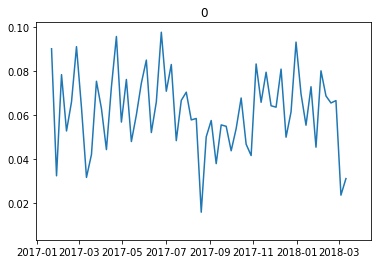

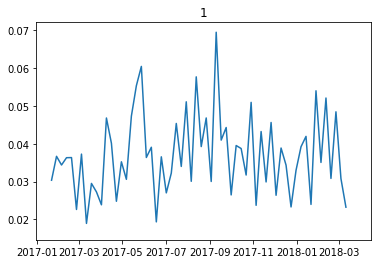

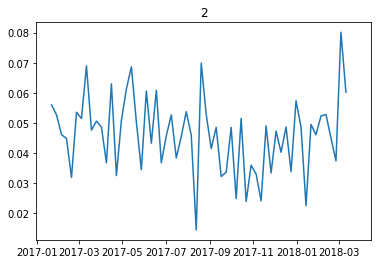

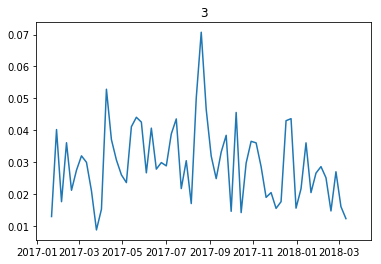

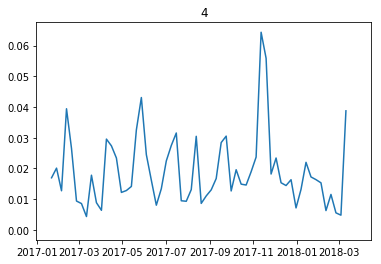

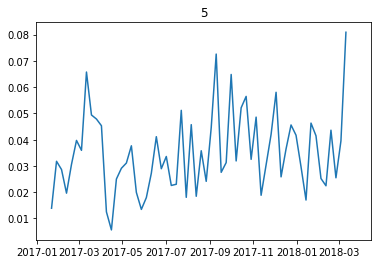

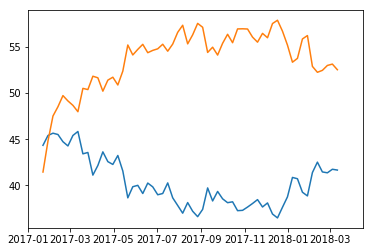

In [34]:
for i in features.columns:
    x = features[i].resample("W").mean()
    plt.plot(x)
    plt.title(i)
    plt.show()
x = final_df['adjusted_approve'].resample("W").mean()
y = final_df['adjusted_disapprove'].resample("W").mean()
plt.plot(x)
plt.plot(y)
plt.show()

In [35]:
y = combinations(test.columns, 2)
for i in y:
    (r, p) = pearsonr(test[i[0]], test[i[1]])
    print("the coefficient for " + str(i[0]) + "and " + str(i[1]) + "is: " + str(r))
    print(p)

the coefficient for Positive_percentand Negative_percentis: -0.19185255561679543
0.0005371899743974534
the coefficient for Positive_percentand Trust_percentis: 0.1770966877670073
0.0014188656275968816
the coefficient for Positive_percentand Fear_percentis: -0.10867117855151483
0.05138812992053555
the coefficient for Positive_percentand Sadness_percentis: -0.1206930815550175
0.03036789726420747
the coefficient for Positive_percentand Anger_percentis: -0.1686823922073123
0.0023901162363313567
the coefficient for Positive_percentand Surprise_percentis: 0.3784288865797382
2.1054483630492955e-12
the coefficient for Positive_percentand Disgust_percentis: -0.18267966352053203
0.0009909814921138503
the coefficient for Positive_percentand Joy_percentis: 0.627056478818262
1.3707970731630894e-36
the coefficient for Positive_percentand Anticipation_percentis: 0.5221662142578665
6.396160602154008e-24
the coefficient for Positive_percentand Womens Issues_percentis: 0.03135050908537221
0.575128352879

In [38]:
#differrences in approval percentages 
#this means that a 1% shift in approval/disapproval could be about 3 million americans, 2.3 million voting eligible americans, or 2.5 million voting age americans
#numbers were according to the united states election project (http://www.electproject.org/2016g)
app = final_df['adjusted_approve']
app_dif = app.rolling(window=2).apply(np.diff)
app_dif

Date
2017-01-20         NaN
2017-01-21    0.000000
2017-01-22    0.000000
2017-01-23    1.565457
2017-01-24    0.228415
2017-01-25   -1.867383
2017-01-26    1.320631
2017-01-27   -1.630679
2017-01-28    0.976600
2017-01-29    2.111221
2017-01-30   -0.948263
2017-01-31   -0.291143
2017-02-01    0.267978
2017-02-02   -1.330391
2017-02-03    0.613998
2017-02-05    0.489558
2017-02-06   -0.116902
2017-02-07   -0.422770
2017-02-08    0.594211
2017-02-09    0.515153
2017-02-10   -1.496936
2017-02-11   -0.122314
2017-02-13    0.772710
2017-02-14   -0.732824
2017-02-15    1.365078
2017-02-16   -0.814286
2017-02-17   -1.883075
2017-02-18   -0.618124
2017-02-20    2.027248
2017-02-21   -1.936929
                ...   
2018-01-27    1.133333
2018-01-28   -0.174740
2018-01-29    1.144094
2018-01-30    1.504224
2018-01-31    0.092126
2018-02-01    1.401879
2018-02-02   -2.014298
2018-02-04    1.118386
2018-02-05    0.485543
2018-02-06   -0.478601
2018-02-08    1.570740
2018-02-09   -1.054344
2018-0

In [40]:
dis = final_df['adjusted_disapprove']
dis_dif = dis.rolling(window = 2).apply(np.diff)
dis_dif.describe()

count    321.000000
mean       0.037662
std        1.230763
min       -4.224663
25%       -0.769865
50%        0.024002
75%        0.786045
max        3.755138
Name: adjusted_disapprove, dtype: float64

In [41]:

ln = LinearRegression()
ln.fit(grouped_speeches[3:], app_dif[3:])
print(ln.score(grouped_speeches[3:], app_dif[3:]))
ln.fit(grouped_speeches[3:], dis_dif[3:])
print(ln.score(grouped_speeches[3:], dis_dif[3:]))
ln.fit(features[3:], app_dif[3:])
print(ln.score(features[3:], app_dif[3:]))
ln.fit(features[3:], dis_dif[3:])
print(ln.score(features[3:], dis_dif[3:]))


0.07773634451042867
0.07224101684455786
0.033991363991627166
0.029388837708915094


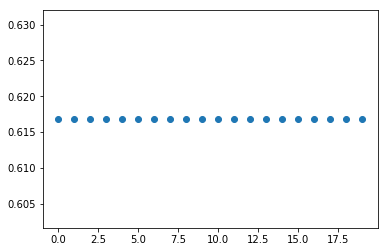

In [42]:
approval_mse = []
disapproval_mse = []
for i in range(20):
    poly_feats = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly_feats.fit_transform(grouped_speeches[3:])
    reg = LinearRegression()
    reg.fit(X_poly, app_dif[3:])
    approval_mse.append(mean_squared_error(reg.predict(X_poly), app_dif[3:]))
    reg.fit(X_poly, dis_dif[3:])
    disapproval_mse.append(mean_squared_error(reg.predict(X_poly), dis_dif[3:]))
plt.scatter(np.arange(20),approval_mse)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(grouped_speeches[3:], app_dif[3:], test_size = 0.25)
ln = LinearRegression()
ln.fit(grouped_speeches[3:], app_dif[3:])
print(ln.intercept_, ln.coef_)
y_pred = ln.predict(X_test)
print(ln.score(X_test, y_test))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

-1.3983281318464398 [  4.4894779    1.20713676   8.84514782   4.15083509  -6.82368419
 -12.31294772   7.50431487  22.09971206  -4.90375701  -2.65545047
 -10.31722259   9.98492584  -4.34173383  -7.50492045   0.68820194
  -1.5454762   11.80414115   5.58762553]
-0.045874450359261854
1.2438395251282224


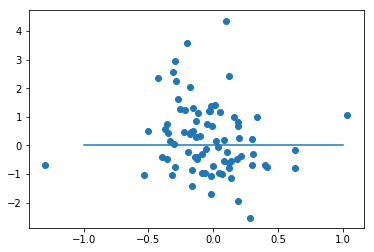

(-0.13411576224876823, 0.23560036816681207)

In [44]:
plt.scatter(y_pred, (y_test - y_pred))
plt.plot((-1, 1), (0,0))
plt.show()
pearsonr(y_pred, (y_test - y_pred))

In [45]:
#sns.pairplot(grouped_speeches)
#plt.savefig("../Trump_Speeches/interactions.png")

In [47]:
changes = grouped_speeches.rolling(window=2).apply(np.diff)
ln = LinearRegression()
ln.fit(changes[3:], app_dif[3:])
print(ln.intercept_, ln.coef_)
ln.score(changes[3:], app_dif[3:])

-0.009041279316648094 [  2.22387426   3.04370722   4.10478023   6.79554191  -6.70198644
 -13.08127256  12.60742389   8.82163609  -4.72812988   1.24052201
  -7.75333115  14.12077092  -8.40875907  -1.03036933  -2.79633154
  -2.46934352  12.88883274   0.70254275]


0.10696805729500958

In [48]:
ln.fit(changes[3:], dis_dif[3:])
print(ln.intercept_, ln.coef_)
ln.score(changes[3:], dis_dif[3:])

0.03805105583915739 [ -0.02643847   0.75423761  -3.56401966  -4.76212345   4.94348062
  12.38111484  -7.72921671 -10.9185618    2.6108961   -5.09364376
  10.94529393 -12.62173982   7.33151704  -4.15584624   0.87306859
   1.83786753 -15.99688995   0.69855308]


0.11744413831322253

In [50]:
X_train, X_test, y_train, y_test = train_test_split(grouped_speeches[3:], app_class_dif[3:], test_size = 0.25)


In [51]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
for i, j in zip(grouped_speeches.columns, rf.feature_importances_):
    print(i, j)

0.425
Positive_percent 0.07281267721240534
Negative_percent 0.05014381872928706
Trust_percent 0.10708092357674508
Fear_percent 0.05603326228472978
Sadness_percent 0.05558265575002983
Anger_percent 0.05858955248276535
Surprise_percent 0.04684441107449125
Disgust_percent 0.0401004813550123
Joy_percent 0.060022666374674946
Anticipation_percent 0.08117668023996208
Womens Issues_percent 0.06198404361689987
Constitution Issues_percent 0.045049788673449394
Social Issues_percent 0.06199231280142538
Environmental Issues_percent 0.03724782643417479
Military/Defense_percent 0.05461721534700831
 Foreign Relations_percent 0.022771621012136804
Healthcare/Welfare_percent 0.05146527197865834
US Economy_percent 0.03648479105614416


In [52]:
dis_class = []
for i in dis_dif.values:
    if i > 0:
        dis_class.append("up")
    elif i < 0:
        dis_class.append("down")
    else:
        dis_class.append('zero')
dis_class_dif = pd.Series(dis_class, index=dis_dif.index)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(grouped_speeches[3:], dis_class_dif[3:], test_size = 0.25)

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
for i, j in zip(grouped_speeches.columns, rf.feature_importances_):
    print(i, j)

0.6125
Positive_percent 0.06254930165076727
Negative_percent 0.04379990573580362
Trust_percent 0.11353334634027501
Fear_percent 0.04503854327441091
Sadness_percent 0.06210713853250789
Anger_percent 0.08963731574376863
Surprise_percent 0.045367347623499754
Disgust_percent 0.03919005407006151
Joy_percent 0.03832254567740114
Anticipation_percent 0.05322114392666507
Womens Issues_percent 0.0770314170513118
Constitution Issues_percent 0.0512370147755163
Social Issues_percent 0.05744320107656026
Environmental Issues_percent 0.04580080325727477
Military/Defense_percent 0.03615026437808773
 Foreign Relations_percent 0.03797454444658539
Healthcare/Welfare_percent 0.04865102120091586
US Economy_percent 0.05294509123858706


In [55]:
x = by_day.drop('Speech Length', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x[3:], dis_class_dif[3:], test_size = 0.25)

In [56]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test, y_pred))
for i, j in zip(grouped_speeches.columns, rf.feature_importances_):
    print(i, j)

0.55
Positive_percent 0.051714109172784226
Negative_percent 0.035893046793796665
Trust_percent 0.0650503868238047
Fear_percent 0.06024472503768832
Sadness_percent 0.07763811285247035
Anger_percent 0.05696812649831405
Surprise_percent 0.03181543320569531
Disgust_percent 0.06742118628039483
Joy_percent 0.04330915085735695
Anticipation_percent 0.07193286328603438
Womens Issues_percent 0.07715743694763325
Constitution Issues_percent 0.052638806908929456
Social Issues_percent 0.04219912834684193
Environmental Issues_percent 0.05068701289409977
Military/Defense_percent 0.0647542230591803
 Foreign Relations_percent 0.028809375906828964
Healthcare/Welfare_percent 0.06155087168696566
US Economy_percent 0.06021600344118085


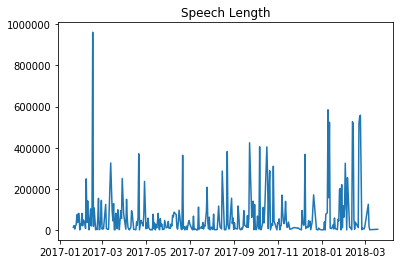

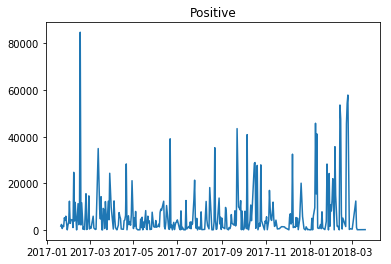

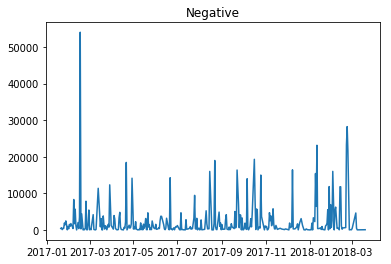

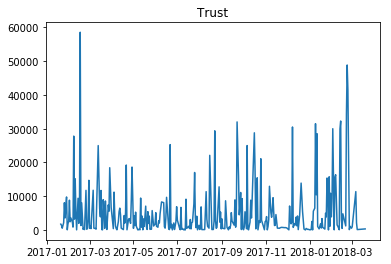

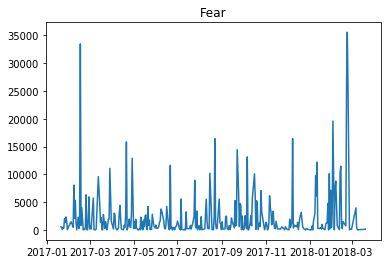

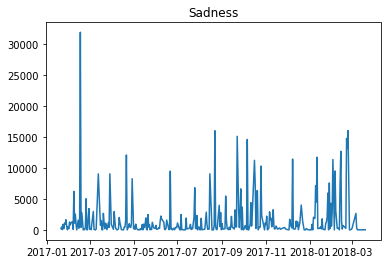

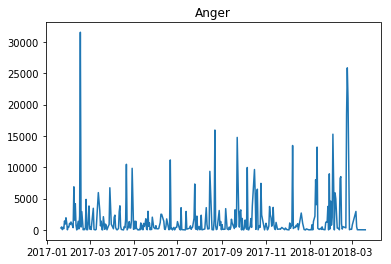

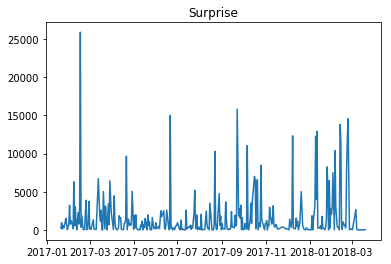

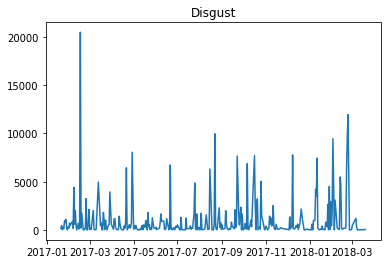

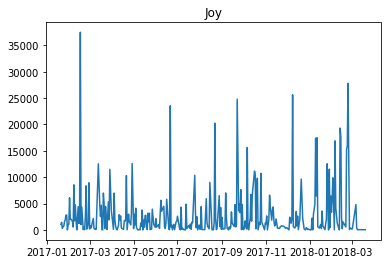

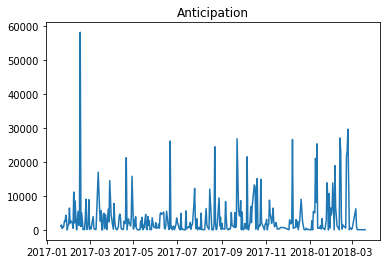

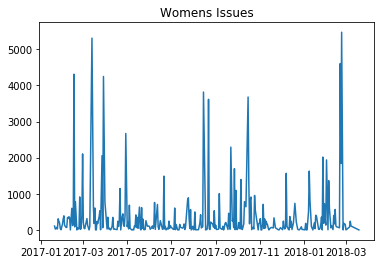

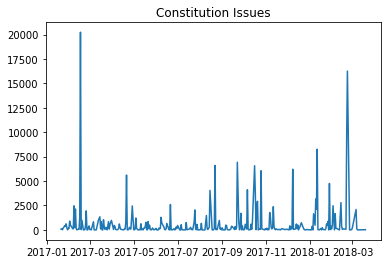

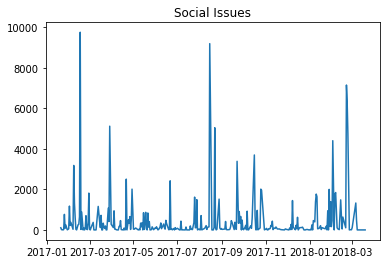

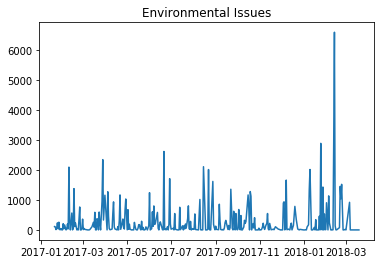

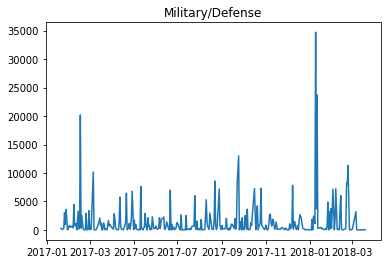

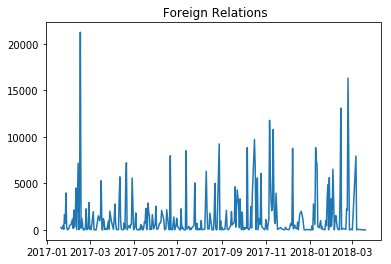

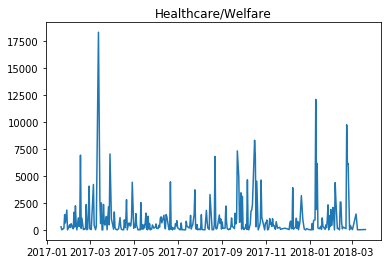

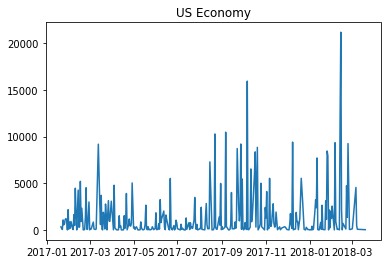

In [64]:
for i in by_day:
    plt.plot(by_day.index, by_day[i])
    plt.title(i)
    plt.show()

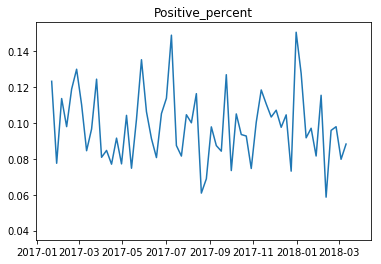

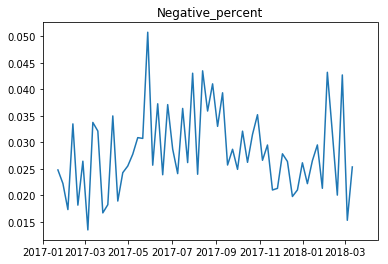

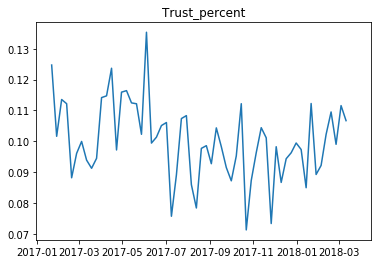

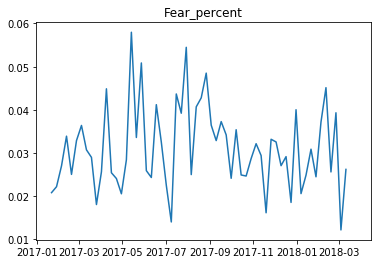

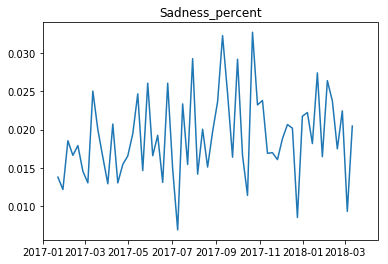

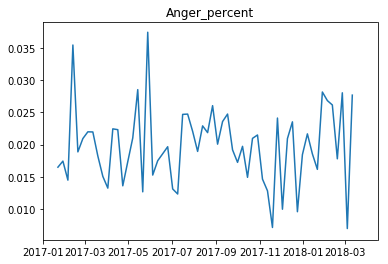

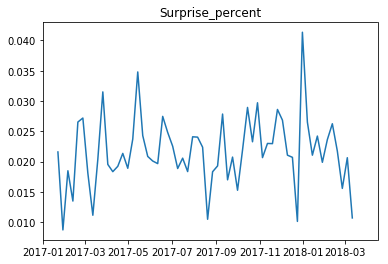

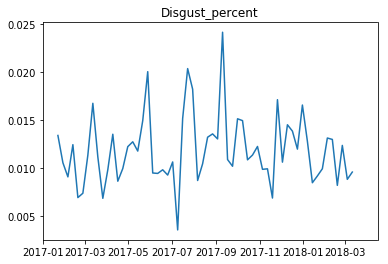

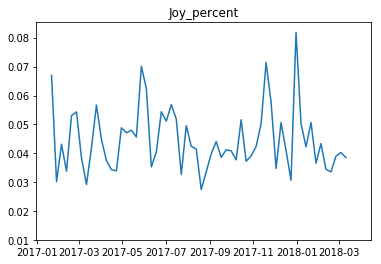

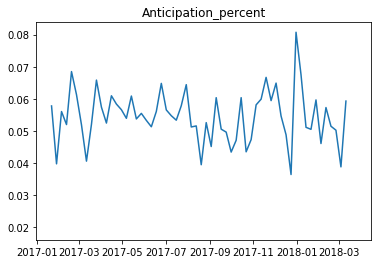

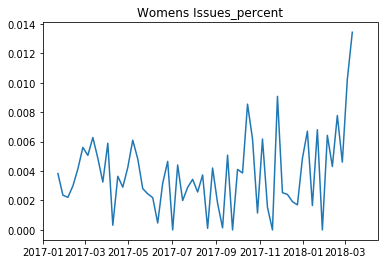

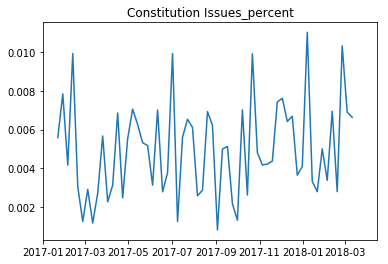

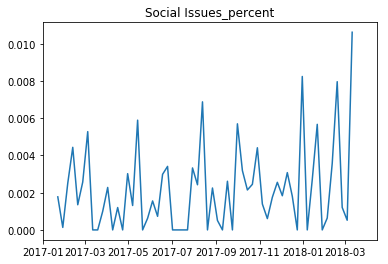

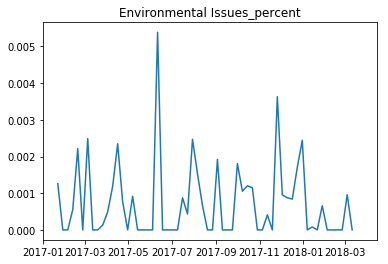

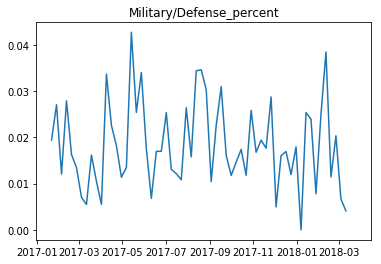

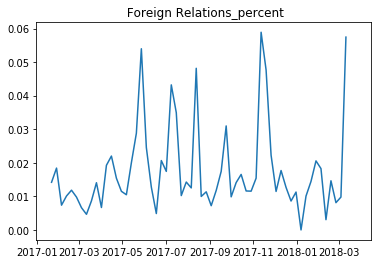

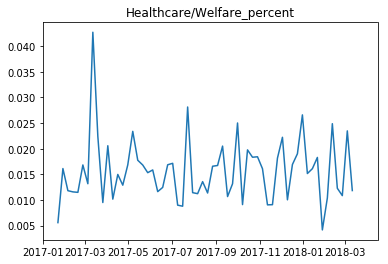

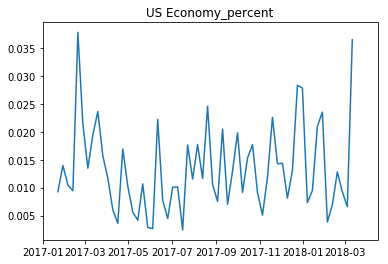

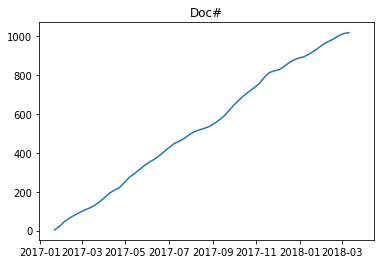

In [59]:
for i in percent.columns:
    weeks = percent[i].resample('W').median()
    plt.plot(weeks.index, weeks)
    plt.title(i)
    plt.show()

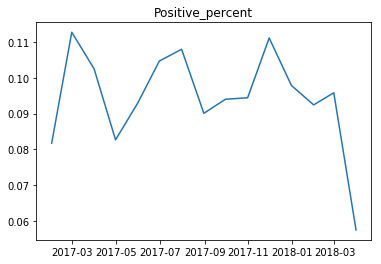

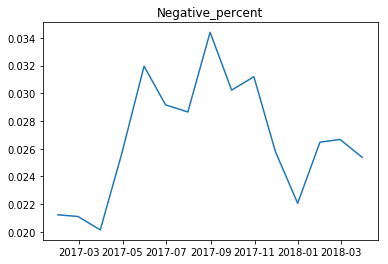

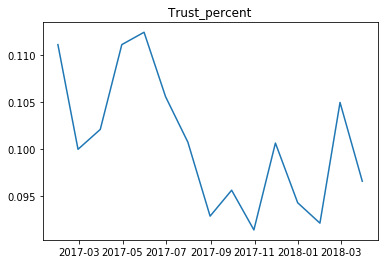

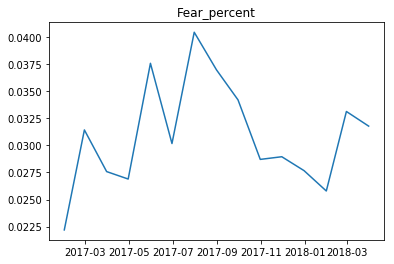

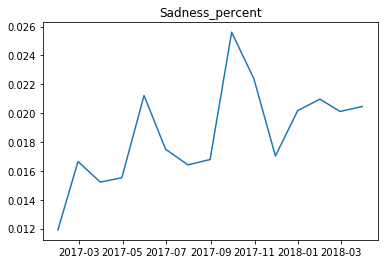

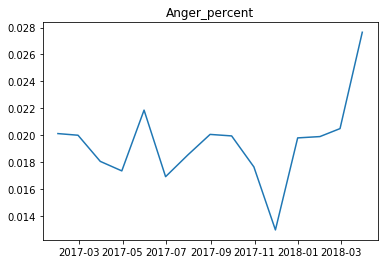

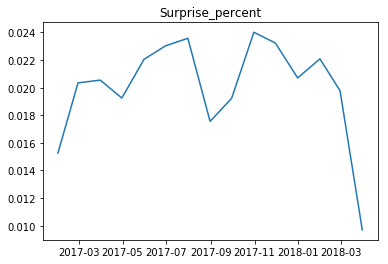

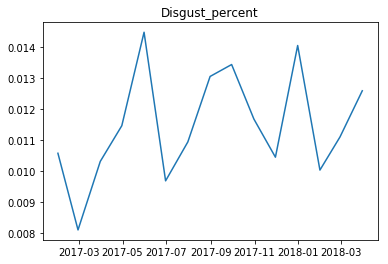

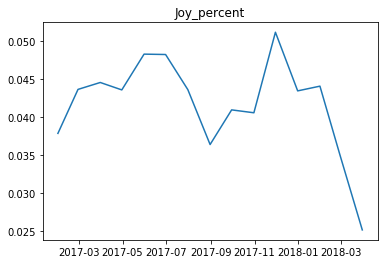

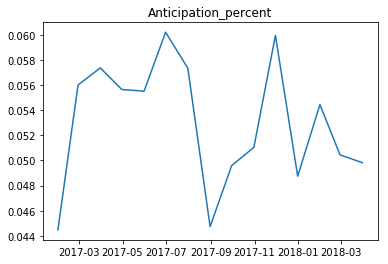

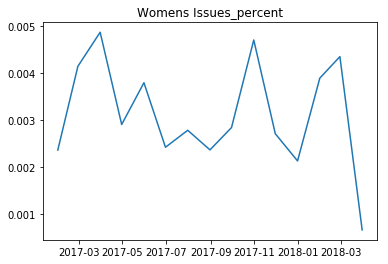

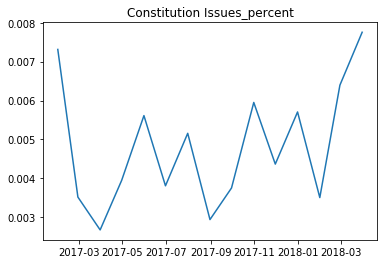

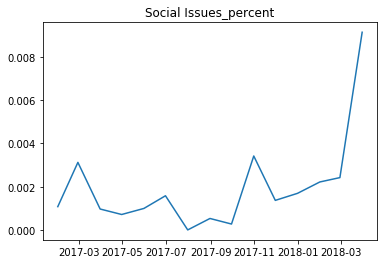

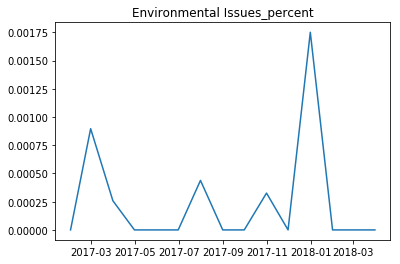

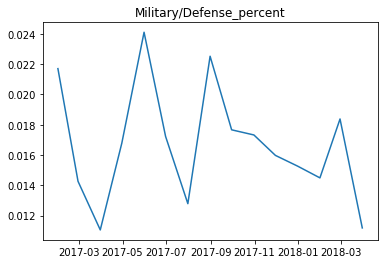

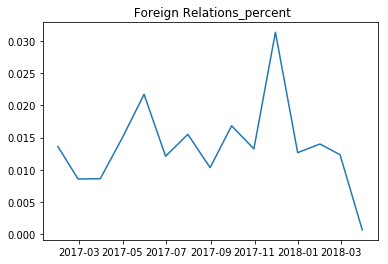

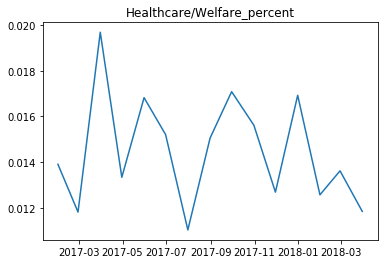

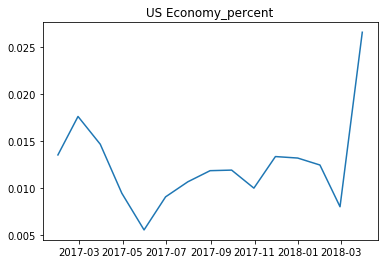

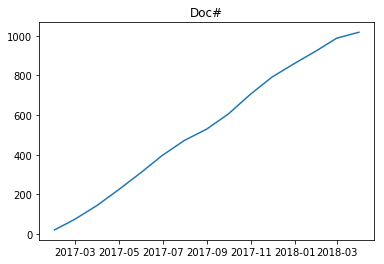

In [61]:
for i in percent.columns:
    months = percent[i].resample('M').median()
    plt.plot(months.index, months)
    plt.title(i)
    plt.show()

In [62]:
by_week = df.resample('W', on='Date').sum()
grouped_speeches = pd.DataFrame()
for i in corpora:
    grouped_speeches[i+'_percent'] = by_week[i]/by_week['Speech Length']
copy_df = df.copy()
copy_df.index = copy_df.Date
copy_df = copy_df[['adjusted_approve', 'adjusted_disapprove']]
copy_df = copy_df.resample('W').mean()
grouped_df = pd.merge(grouped_speeches, copy_df, left_index=True, right_index=True)
final_df = grouped_df.groupby(grouped_df.index).mean()
final_df


,Positive_percent,Negative_percent,Trust_percent,Fear_percent,Sadness_percent,Anger_percent,Surprise_percent,Disgust_percent,Joy_percent,Anticipation_percent,Womens Issues_percent,Constitution Issues_percent,Social Issues_percent,Environmental Issues_percent,Military/Defense_percent,Foreign Relations_percent,Healthcare/Welfare_percent,US Economy_percent,adjusted_approve,adjusted_disapprove
Date,,,,,,,,,,,,,,,,,,,,
2017-01-22,0.119020,0.028603,0.093514,0.027666,0.018895,0.021654,0.034043,0.016631,0.072016,0.076024,0.004216,0.005518,0.003410,0.005778,0.014315,0.013300,0.009187,0.013950,44.337578,41.444922
2017-01-29,0.067789,0.025442,0.102032,0.025926,0.016902,0.019332,0.015149,0.010856,0.033244,0.044851,0.002802,0.006886,0.003960,0.002067,0.032643,0.022837,0.017261,0.018139,45.314867,44.702124
2017-02-05,0.123868,0.027243,0.091792,0.023607,0.022542,0.020503,0.029985,0.013413,0.058962,0.067840,0.004765,0.009355,0.008465,0.001903,0.013639,0.012297,0.008308,0.018629,45.558709,47.310851
2017-02-12,0.095249,0.035359,0.106954,0.035185,0.022473,0.028046,0.022690,0.015666,0.035615,0.051410,0.002923,0.010471,0.010545,0.005432,0.015678,0.017858,0.010066,0.017059,45.817515,48.185850
2017-02-19,0.093240,0.050334,0.067058,0.033898,0.030375,0.030115,0.026526,0.018763,0.041300,0.059817,0.004708,0.017690,0.009216,0.001819,0.021673,0.026605,0.007972,0.010371,44.883803,49.593024
2017-02-26,0.114381,0.039087,0.085405,0.032634,0.025627,0.025177,0.029608,0.016283,0.054584,0.061160,0.004958,0.011052,0.004258,0.005199,0.014629,0.012075,0.012802,0.027640,43.926178,49.302286
2017-03-05,0.105526,0.036864,0.094934,0.042476,0.027127,0.027837,0.024966,0.015028,0.055142,0.059050,0.013439,0.003466,0.010990,0.002367,0.020885,0.017020,0.027593,0.022787,45.352289,48.782633
2017-03-12,0.052621,0.032378,0.094474,0.043343,0.023377,0.026460,0.011565,0.015692,0.019023,0.033590,0.003894,0.006122,0.002718,0.000117,0.074450,0.014538,0.036578,0.007875,46.044424,47.710346
2017-03-19,0.105760,0.033803,0.079314,0.029964,0.024422,0.018787,0.020772,0.013641,0.041456,0.051851,0.011354,0.005579,0.004021,0.001750,0.008688,0.015764,0.040664,0.027510,43.649566,50.411679


In [ ]:
df = pd.read_excel('speech_data.xlsx', header= 0, parse_dates= ['Date'])
df.index = df['Date']
df = df.drop(columns='Date')
app_day = df.adjusted_approve.resample('d').mean().dropna()
app_week = df.adjusted_approve.resample('w').mean().dropna()
app_month = df.adjusted_approve.resample('m').mean().dropna()
dis_day = df.adjusted_disapprove.resample('d').mean().dropna()
dis_week = df.adjusted_disapprove.resample('w').mean().dropna()
dis_month = df.adjusted_disapprove.resample('m').mean().dropna()
dif_app_day = df.adjusted_approve.resample('d').mean().rolling(window=2).apply(np.diff).replace(np.NAN, 0)[1:]
dif_app_week = df.adjusted_approve.resample('w').mean().rolling(window=2).apply(np.diff).replace(np.NAN, 0)[1:]
dif_app_month = df.adjusted_approve.resample('m').mean().rolling(window=2).apply(np.diff).replace(np.NAN, 0)[1:]
dif_dis_day = df.adjusted_disapprove.resample('d').mean().rolling(window=2).apply(np.diff).replace(np.NAN, 0)[1:]
dif_dis_week = df.adjusted_disapprove.resample('w').mean().rolling(window=2).apply(np.diff).replace(np.NAN, 0)[1:]
dif_dis_month = df.adjusted_disapprove.resample('m').mean().rolling(window=2).apply(np.diff).replace(np.NAN, 0)[1:]
rating_day = [app_day.bfill(), dis_day.bfill(), dif_app_day, dif_dis_day]
rating_week = [app_week, dis_week, dif_app_week, dif_dis_week]
rating_month = [app_month, dis_month, dif_app_month, dif_dis_month]

In [ ]:
for i in range(1, 5):
    reg.fit(day_df.iloc[:, :18], day_df.iloc[:,-i])
    print(reg.intercept_, reg.coef_)
    print(reg.score(day_df.iloc[:, :18], day_df.iloc[:,-i]))

In [ ]:
t = []
for i in range(1, 5):
    reg.fit(week_df.iloc[:, :18], week_df.iloc[:,-i])
    #print(reg.intercept_, reg.coef_)
    t.append(reg.score(week_df.iloc[:, :18], week_df.iloc[:,-i]))
    print(reg.score(week_df.iloc[:, :18], week_df.iloc[:,-i]))

In [ ]:

We could average the proportions and smooth the by_day values to get an average for the week

t1 = []
for i in range(1, 5):
    reg.fit(by_day.resample('w').mean().dropna(), week_df.iloc[:,-i])
    #print(reg.intercept_, reg.coef_)
    t1.append(reg.score(by_day.resample('w').mean().dropna(), week_df.iloc[:,-i]))
    print(reg.score(by_day.resample('w').mean().dropna(), week_df.iloc[:,-i]))

In [ ]:
for i in rating_week:
    reg.fit(by_week.iloc[:,:18], i)
    print(reg.score(by_week.iloc[:,:18], i))

we should try decision trees on the week data

In [63]:
app = final_df['adjusted_approve']
app.resample('W').mean()


Date
2017-01-22    44.337578
2017-01-29    45.314867
2017-02-05    45.558709
2017-02-12    45.817515
2017-02-19    44.883803
2017-02-26    43.926178
2017-03-05    45.352289
2017-03-12    46.044424
2017-03-19    43.649566
2017-03-26    43.955338
2017-04-02    41.970399
2017-04-09    41.978153
2017-04-16    43.439167
2017-04-23    42.298113
2017-04-30    42.309375
2017-05-07    43.010018
2017-05-14    41.795501
2017-05-21    38.524812
2017-05-28    39.623175
2017-06-04    40.403407
2017-06-11    39.129259
2017-06-18    40.165537
2017-06-25    40.383501
2017-07-02    38.769566
2017-07-09    39.464775
2017-07-16    40.450530
2017-07-23    38.560434
2017-07-30    37.736604
2017-08-06    37.122446
2017-08-13    38.399666
                ...    
2017-09-03    37.330000
2017-09-10    39.871712
2017-09-17    38.340566
2017-09-24    39.526029
2017-10-01    38.609361
2017-10-08    38.357759
2017-10-15    38.165310
2017-10-22    37.514700
2017-10-29    37.310792
2017-11-05    37.827710
2017-11-12 